# **Sale Price Analysis**

## Objectives

* The objective of this notebook is to visualize the relationships between various features and the target variable 'SalePrice' in the Ames Housing dataset, using joint plots and linear model plots.

## Inputs

* The input required to run this notebook is the Ames Housing dataset (housing_records.csv), specifically the preprocessed dataframe df_eda and the list of top correlated features vars_to_study. 

## Outputs

* The outputs generated by the end of this notebook are a series of joint plots and linear model plots, each showing the relationship between a feature and the 'SalePrice' variable. 

## Additional Comments

* These visualizations can help to identify patterns and correlations in the data, and can inform feature engineering and modeling decisions in subsequent notebooks. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/PP5-Predictive-Analytics/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/PP5-Predictive-Analytics'

---

# Import Libraries and Load Data:

Import required libraries 

In [4]:
# import all necessary packages and libraries for the notebook
import os
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
sns.set_style("darkgrid") # Dark background

Load Data

In [5]:
df_raw_path = "outputs/dataset/housing_records.csv"
data = pd.read_csv(df_raw_path)
data.head(3)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
0        150            0.0         548          RFn  ...         65.0   
1        284            NaN         460          RFn  ...         80.0   
2        434            0.0         608          RFn  ...         68.0   

   MasVnrArea OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  WoodDeckSF  \
0       196.0          61            5            7          856         0.0   
1         0.0           0            8            6         1262         NaN   
2       162.0          42            5            7          920         NaN   

   YearBuilt  YearRemodAdd  SalePrice  
0       2003          2003     208500  
1       1976          1976     181500  
2       2001          2002     223500  

[3 rows x 24 columns]

---

# Model Training:

Initialize the model 

In [7]:
pandas_report = ProfileReport(df=data, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation and PPS Analysis

In [9]:
def heatmap_corr(data, threshold, figsize=(20, 12), font_size=8):
    # Create a mask to hide the upper triangle and values below the threshold
    mask = np.zeros_like(data, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    mask[abs(data) < threshold] = True

    # Create the heatmap
    fig, axes = plt.subplots(figsize=figsize)
    sns.heatmap(data, annot=True, xticklabels=True, yticklabels=True,
                mask=mask, cmap='viridis', annot_kws={"size": font_size}, ax=axes,
                linewidth=0.5)
    axes.set_yticklabels(data.columns, rotation=0)
    plt.ylim(len(data.columns), 0)
    plt.show()

def heatmap_pps(data, threshold, figsize=(20, 12), font_size=8):
    # Create a mask to hide values below the threshold
    mask = np.zeros_like(data, dtype=bool)
    mask[abs(data) < threshold] = True

    # Create the heatmap
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.heatmap(data, annot=True, xticklabels=True, yticklabels=True,
                     mask=mask, cmap='rocket_r', annot_kws={"size": font_size},
                     linewidth=0.05, linecolor='grey')
    plt.ylim(len(data.columns), 0)
    plt.show()

def compute_correlations_and_pps(data):
    # Compute Spearman and Pearson correlations
    spearman_corr = data.corr(method="spearman")
    pearson_corr = data.corr(method="pearson")

    # Compute Power Predictive Score (PPS)
    pps_matrix_raw = pps.matrix(data)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    # Compute PPS score statistics
    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return pearson_corr, spearman_corr, pps_matrix

def display_correlation_and_pps(pearson_corr, spearman_corr, pps_matrix, corr_threshold, pps_threshold,
                                figsize=(20, 12), font_size=8):
    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(data=spearman_corr, threshold=corr_threshold, figsize=figsize, font_size=font_size)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(data=pearson_corr, threshold=corr_threshold, figsize=figsize, font_size=font_size)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(data=pps_matrix, threshold=pps_threshold, figsize=figsize, font_size=font_size)

Best parameters

In [10]:
pearson_corr, spearman_corr, pps_matrix = compute_correlations_and_pps(data)

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspa

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  552.0  0.055  0.104  0.0  0.0  0.0  0.066  0.702


Train the Best model 



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 





*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



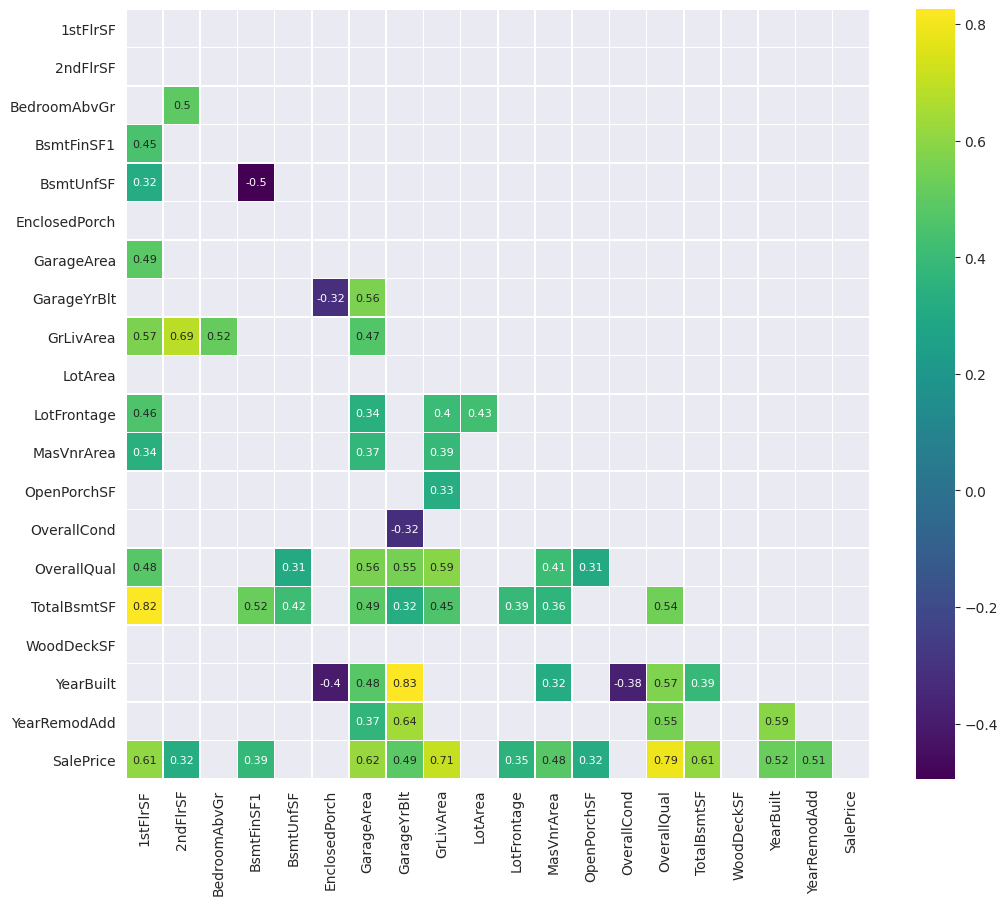



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



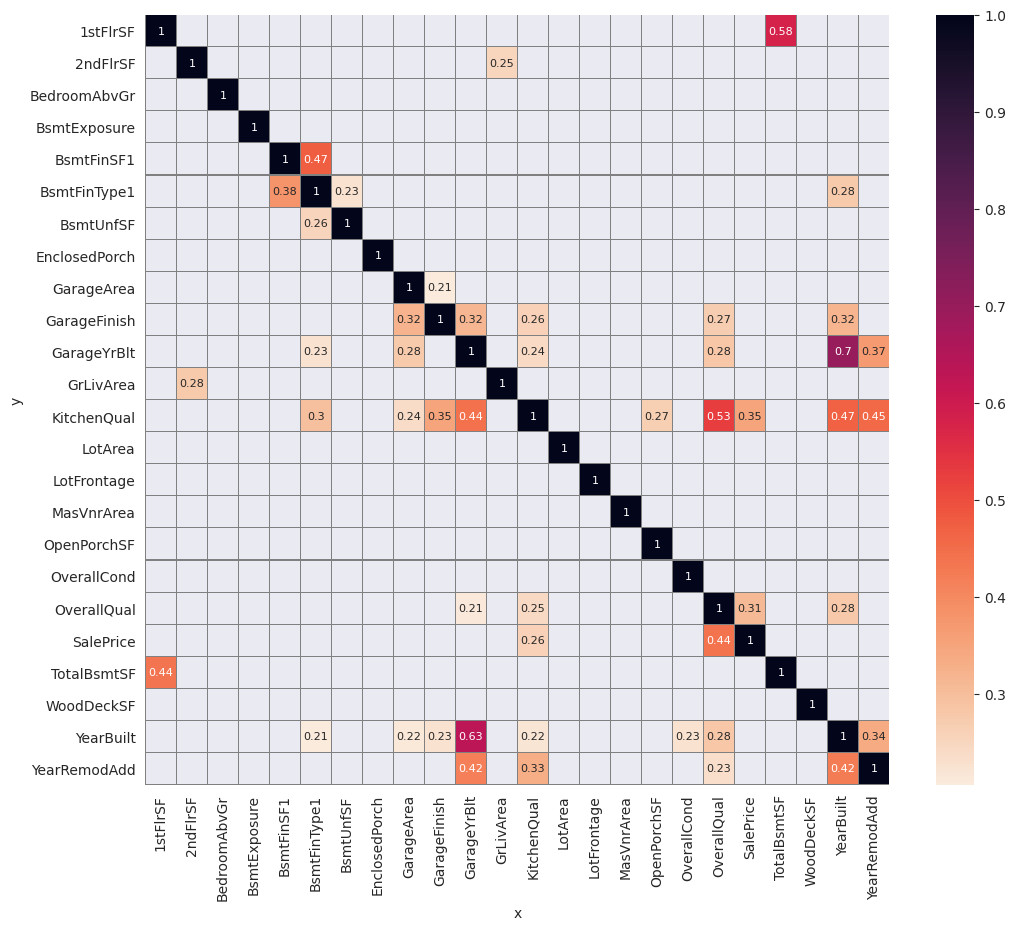

In [11]:
display_correlation_and_pps(pearson_corr = pearson_corr,
                  spearman_corr = spearman_corr,
                  pps_matrix = pps_matrix,
                  corr_threshold = 0.3, pps_threshold = 0.2,
                  figsize=(12,10), font_size = 8)

# Investigating the PPS Matrix

In [12]:
# Get the top 5 features with the highest predictive power score for the 20th feature (index 19)
pps_topscores = pps_matrix.iloc[19].sort_values(key=abs, ascending=False)[1:6]

# Create a bar chart to visualize the top 5 features
plt.bar(x=pps_topscores.index, height=pps_topscores)
plt.xticks(rotation=90)  # Rotate the x-axis tick labels for better readability
plt.title("Predictive Power Score", fontsize=20, y=1.05)  # Set the title with a larger font size
plt.show()  # Display the plot

# Plotting the most correlated variables against Sale Price

This code snippet is used to compute and visualize the Spearman correlation coefficients between the 'SalePrice' feature and all other features in the dataset. The Spearman correlation coefficient is a non-parametric measure of correlation that assesses how well the relationship between two variables can be described using a monotonic function.

The code first computes the Spearman correlation coefficients between 'SalePrice' and all other features using the corr method with method='spearman'. It then sorts the correlation coefficients in descending order of their absolute values, excluding the correlation of 'SalePrice' with itself (which is 1.0). Finally, it prints the sorted correlation coefficients.

In [14]:
# Compute Spearman correlation coefficients between 'SalePrice' and all other features
corr_spearman = data.corr(method='spearman')['SalePrice']

# Sort the correlation coefficients in descending order of their absolute values
# Exclude the correlation of 'SalePrice' with itself (which is 1.0)
corr_spearman = corr_spearman.sort_values(key=abs, ascending=False)[1:]

# Print the sorted correlation coefficients
print(corr_spearman)

OverallQual      0.809829
GrLivArea        0.731310
YearBuilt        0.652682
GarageArea       0.649379
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.421309
LotFrontage      0.409076
BsmtFinSF1       0.301871
2ndFlrSF         0.298809
WoodDeckSF       0.252176
BedroomAbvGr     0.229527
EnclosedPorch   -0.215010
BsmtUnfSF        0.185197
OverallCond     -0.129325
Name: SalePrice, dtype: float64


This code snippet is used to visualize the top 5 features with the highest Spearman correlation coefficients with the 'SalePrice' feature. The corr_spearman variable is assumed to be a Pandas Series with feature names as indices and Spearman correlation coefficients as values, sorted in descending order of their absolute values.

The code creates a bar chart to visualize the top 5 features, with the feature names on the x-axis and the Spearman correlation coefficients on the y-axis. The title of the plot is set with a larger font size. Finally, the plot is displayed using plt.show().

This visualization can help identify the features that are most strongly correlated with 'SalePrice', which can be useful for feature selection and engineering in a regression model.

In [15]:
# Create a bar chart to visualize the top 5 features with the highest Spearman correlation coefficients
plt.bar(x=corr_spearman[:5].index, height=corr_spearman[:5])

# Set the title of the plot with a larger font size
plt.title("Spearman Correlation", fontsize=20, y=1.05)

# Display the plot
plt.show()

In [16]:
# Calculate the Pearson correlation coefficients between the 'SalePrice' feature and all other features
corr_pearson = data.corr(method='pearson')['SalePrice']

# Sort the correlation coefficients in descending order of their absolute values, excluding the 'SalePrice' feature itself
corr_pearson = corr_pearson.sort_values(key=abs, ascending=False)[1:]

# Display the sorted correlation coefficients
corr_pearson

OverallQual      0.790982
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
BsmtFinSF1       0.386420
LotFrontage      0.351799
2ndFlrSF         0.322335
OpenPorchSF      0.315856
LotArea          0.263843
WoodDeckSF       0.252027
BsmtUnfSF        0.214479
EnclosedPorch   -0.176458
BedroomAbvGr     0.161901
OverallCond     -0.077856
Name: SalePrice, dtype: float64

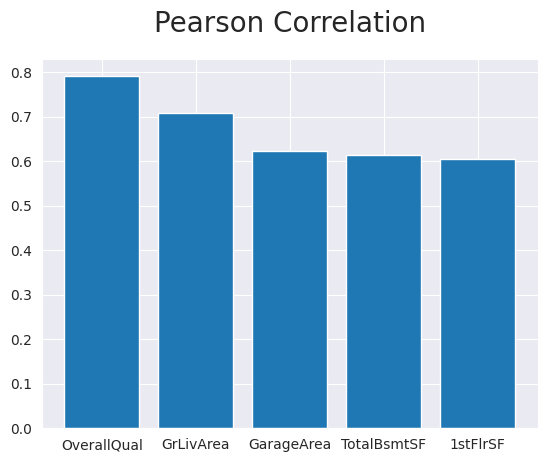

In [17]:
# Create a bar chart to visualize the top 5 features with the highest Pearson correlation coefficients
plt.bar(x=corr_pearson[:5].index, height=corr_pearson[:5])

# Set the title of the chart
plt.title("Pearson Correlation", fontsize=20, y=1.05)

# Display the chart
plt.show()

In [18]:
# Define the number of top features to consider
top_n = 5

# Combine the top features from Pearson and Spearman correlation coefficients
vars_to_study = set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

# Display the combined set of top features
vars_to_study


{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

In [20]:
# Filter the original dataframe to include only the top correlated features and the 'SalePrice' column
df_eda = data.filter(list(vars_to_study) + ['SalePrice'])

# Display the first 3 rows of the filtered dataframe
df_eda.head(3)

GarageArea  TotalBsmtSF  YearBuilt  OverallQual  GrLivArea  1stFlrSF  \
0         548          856       2003            7       1710       856   
1         460         1262       1976            6       1262      1262   
2         608          920       2001            7       1786       920   

   SalePrice  
0     208500  
1     181500  
2     223500

Plot each variable as a scatter plot against the sale price.

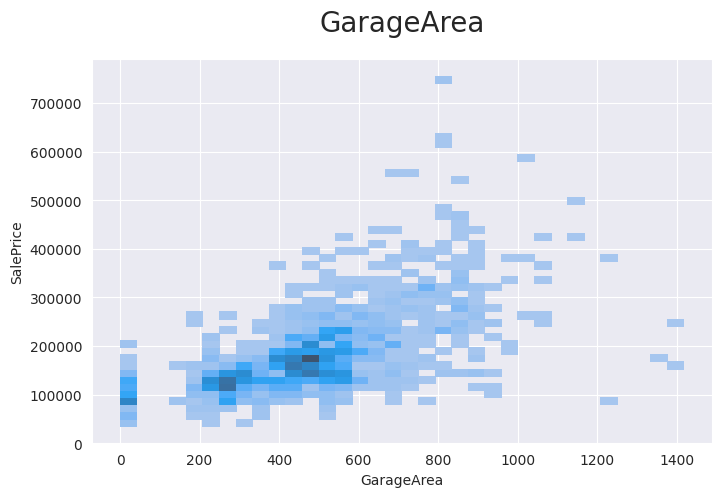

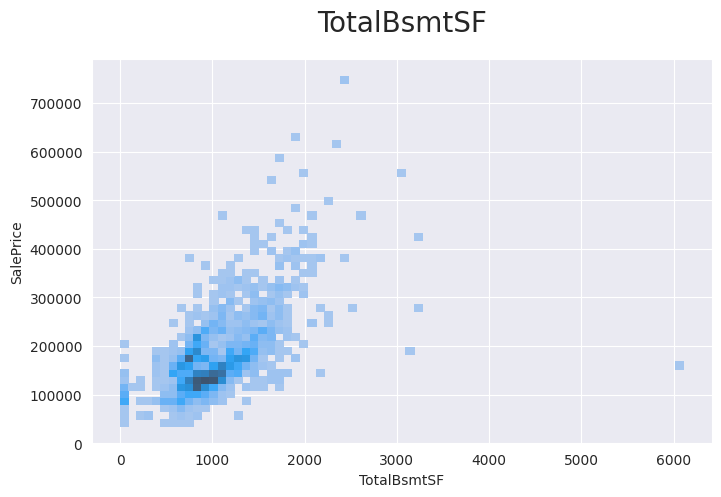

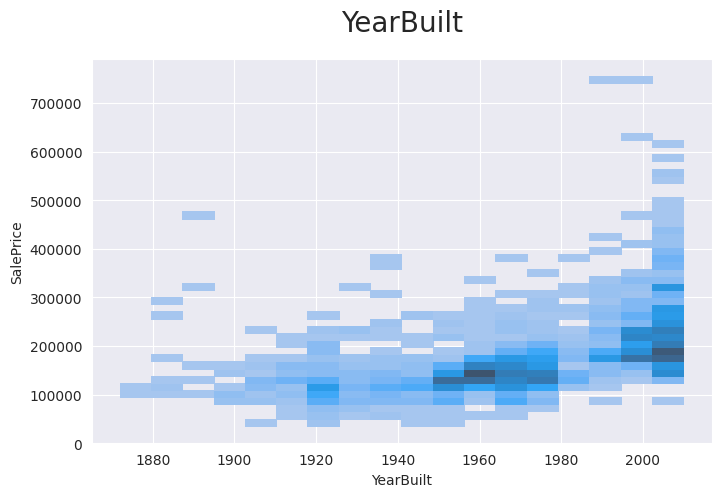

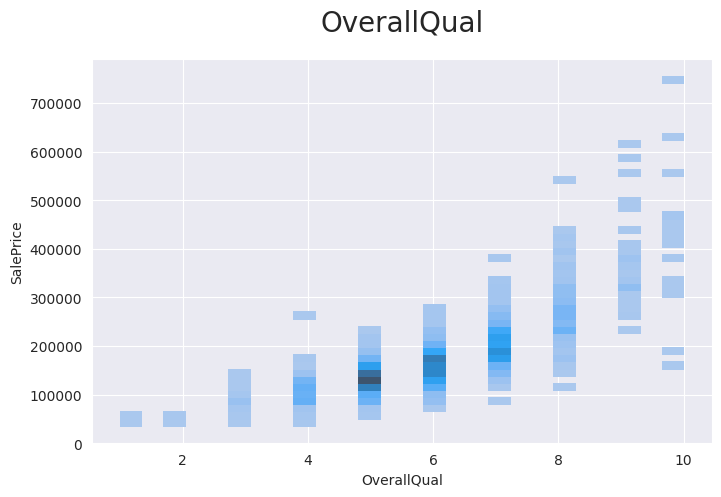

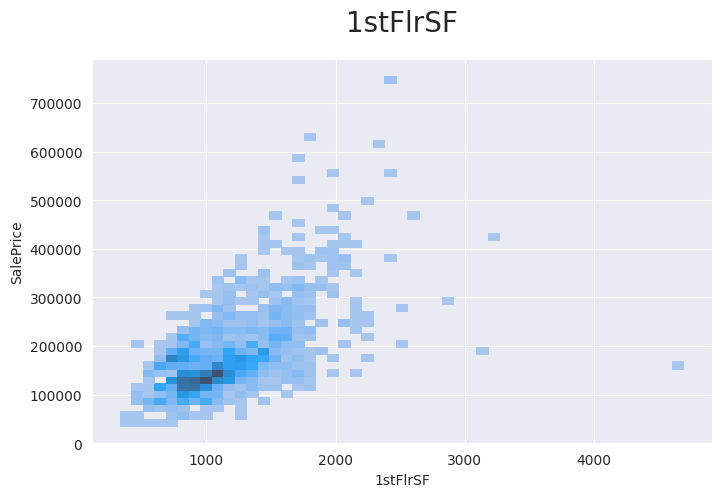

In [21]:
def correlation_to_sale_price_history(data, vars_to_study):
    """
    Display correlation plot between all variables and sale price
    """
    target_var = 'SalePrice'
    for col in vars_to_study:
        # Create a new figure and axis object
        fig, axes = plt.subplots(figsize=(8, 5))
        
        # Create a histogram plot of the relationship between the current column and the target variable
        axes = sns.histplot(data=data, x=col, y=target_var)
        
        # Set the title of the plot to the current column name
        plt.title(f"{col}", fontsize=20, y=1.05)
        
        # Display the plot
        plt.show()
        
        # Print a blank line to separate the plots
        print("\n\n")

# Call the function to generate the correlation plots
correlation_to_sale_price_history(df_eda, vars_to_study)

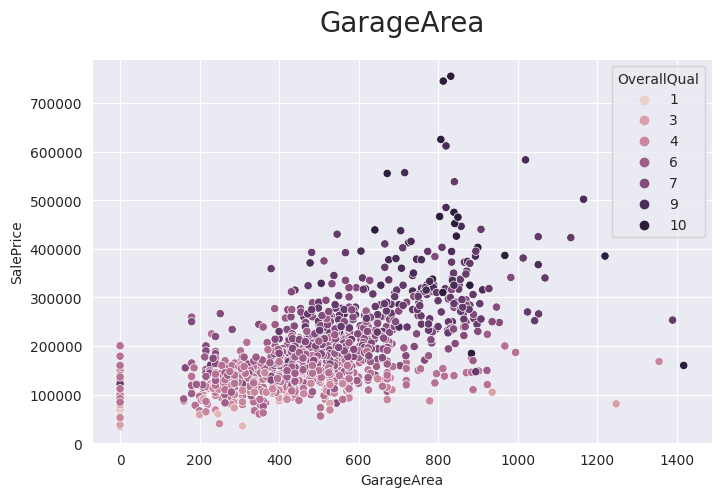

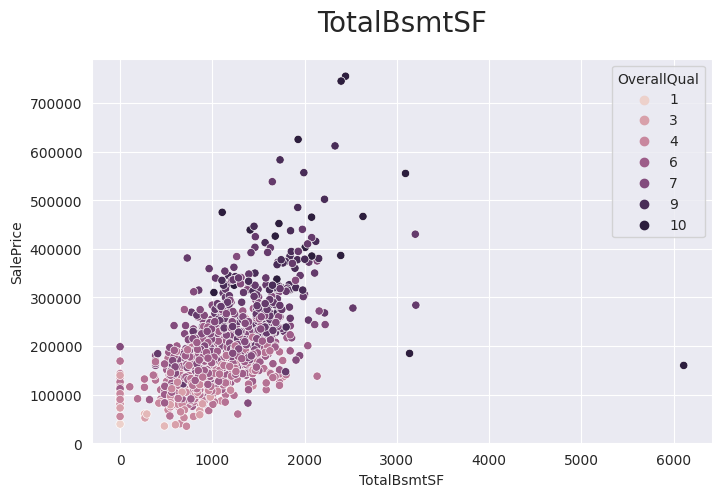

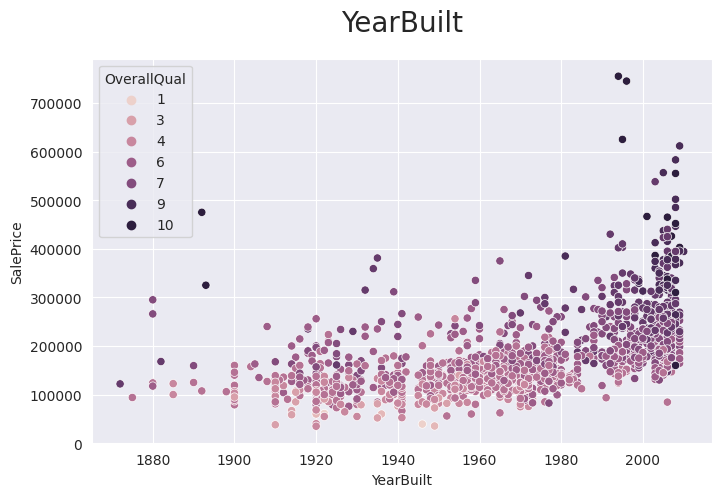

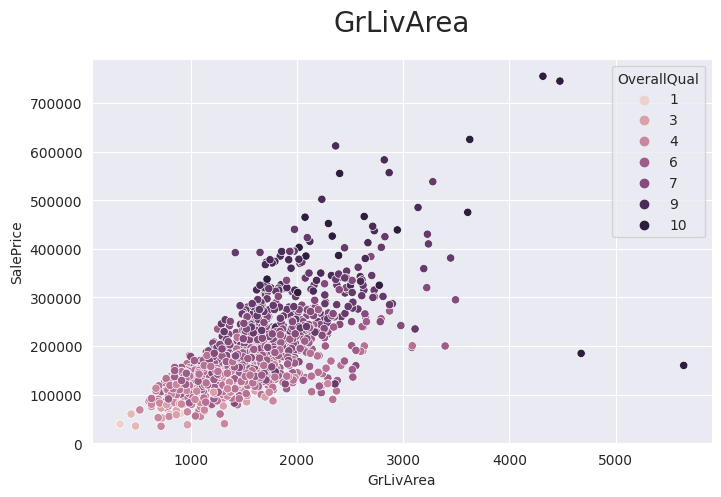

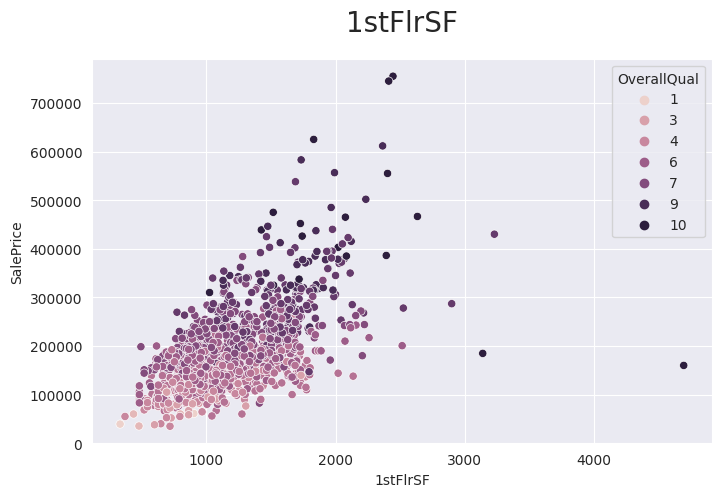

In [22]:
def correlation_to_sale_price_scatter(data, vars_to_study):
    """
    Generate scatterplots of variables vs SalePrice
    """
    target_var = 'SalePrice'
    for col in vars_to_study:
        # Create a new figure and axis object
        fig, axes = plt.subplots(figsize=(8, 5))
        
        # Create a scatterplot of the relationship between the current column and the target variable
        # Color the points by the 'OverallQual' column
        axes = sns.scatterplot(data=data, x=col, y=target_var, hue='OverallQual')
        
        # Set the title of the plot to the current column name
        plt.title(f"{col}", fontsize=20, y=1.05)
        
        # Display the plot
        plt.show()
        
        # Print a blank line to separate the plots
        print("\n\n")

# Call the function to generate the scatterplots
correlation_to_sale_price_scatter(df_eda, vars_to_study)

/workspace/.pip-modules/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


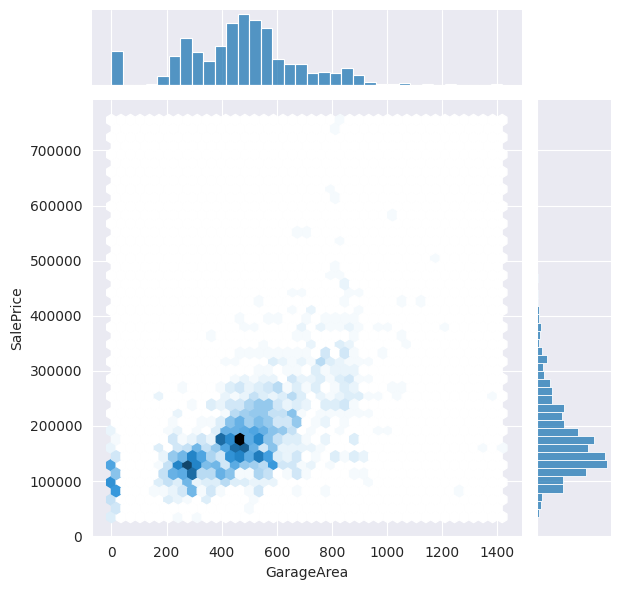

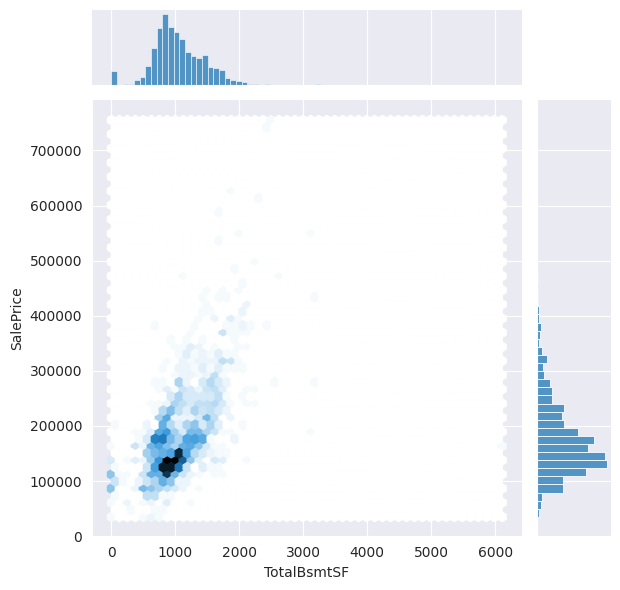

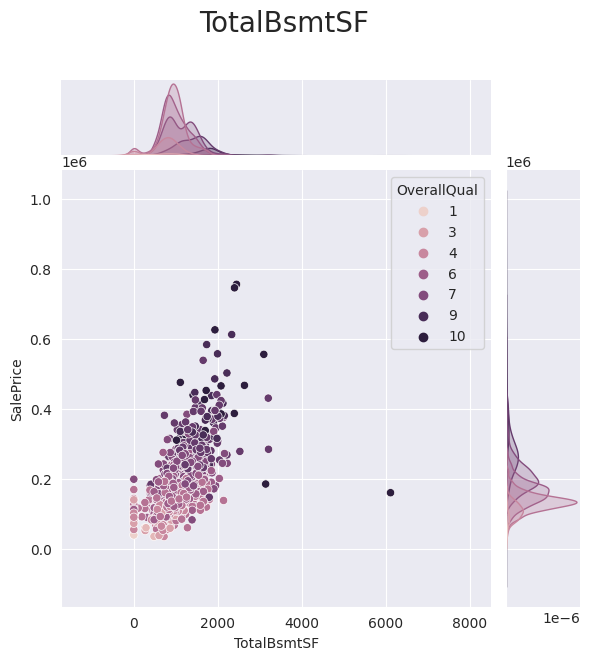

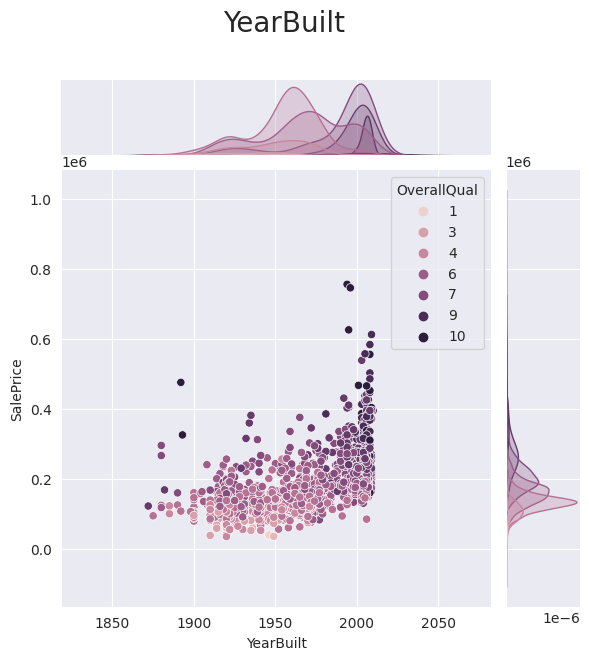

/workspace/.pip-modules/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


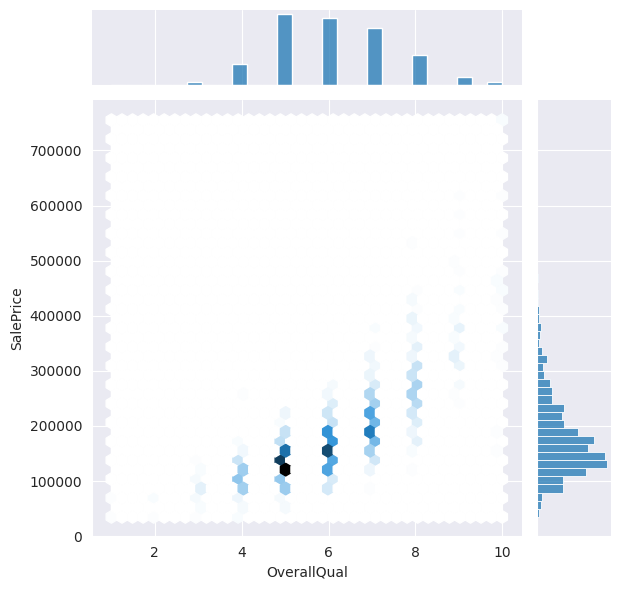

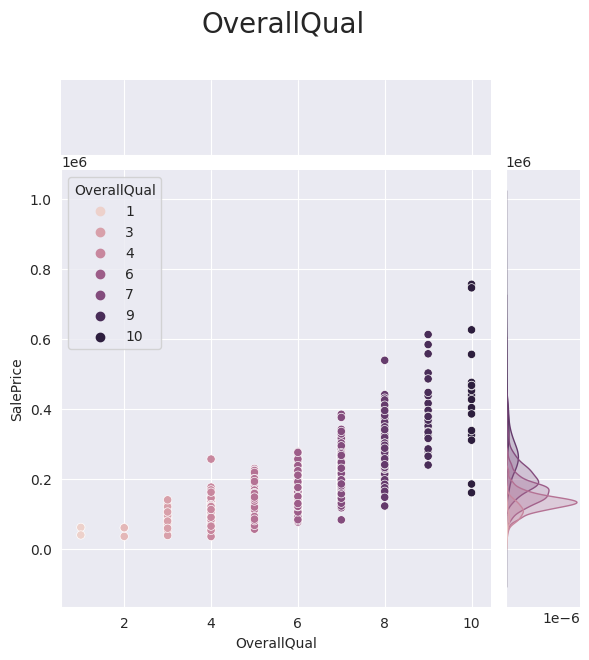

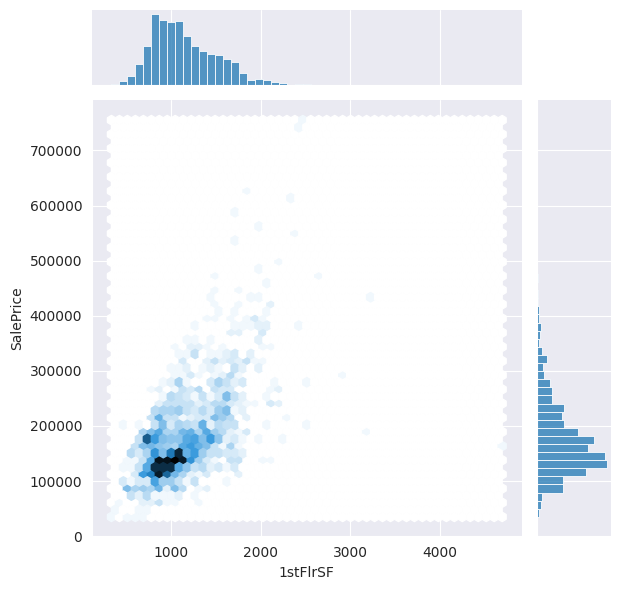

In [24]:
def correlation_to_sale_price_joint(data, vars_to_study):
    """
    Generate joint plots of variables vs SalePrice
    """
    target_var = 'SalePrice'
    for col in vars_to_study:
        # Define the x, y, and hue variables
        x, y, hue = col, target_var, 'OverallQual'
        
        # Create a joint plot of the relationship between the current column and the target variable
        # Use a hexbin plot to show the density of the points
        sns.jointplot(data=data, x=x, y=y, kind='hex')
        
        # Create a joint plot with hue
        sns.jointplot(data=data, x=x, y=y, hue=hue)
        
        # Set the title of the plot to the current column name
        plt.title(f"{col}", fontsize=20, y=1.3, x=-3)
        
        # Display the plot
        plt.show()
        
        # Print a blank line to separate the plots
        print("\n\n")

# Call the function to generate the joint plots
correlation_to_sale_price_joint(df_eda, vars_to_study)

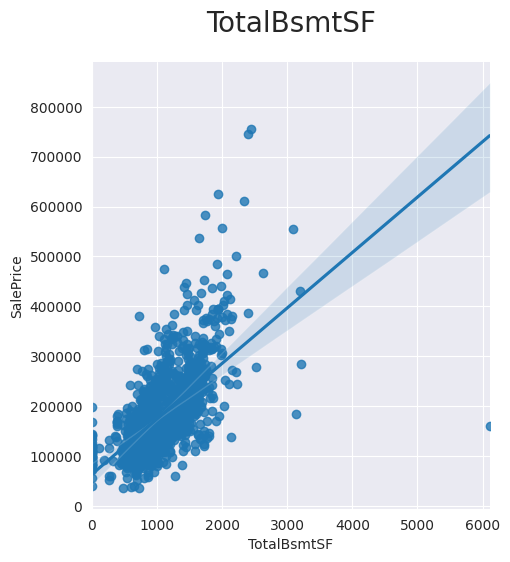

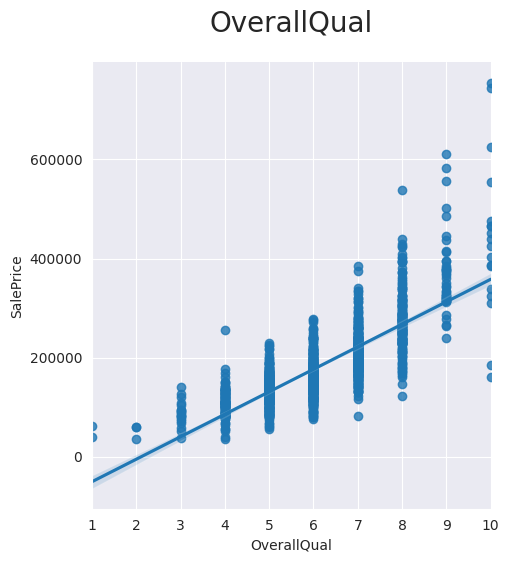

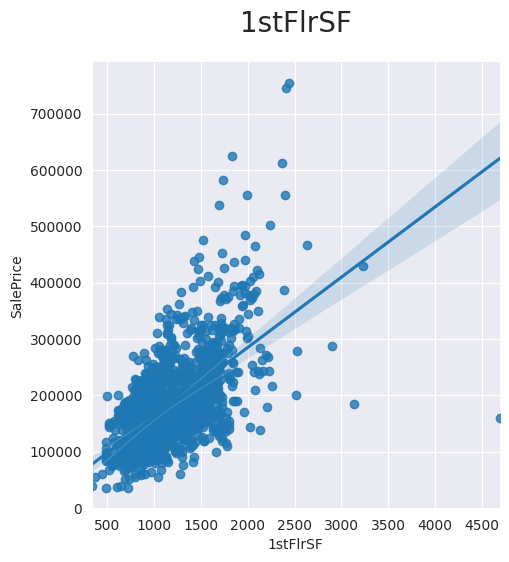

In [25]:
def correlation_to_sale_price_lm(data, vars_to_study):
    """
    Generate linear model plots of variables vs SalePrice
    """
    target_var = 'SalePrice'
    for col in vars_to_study:
        # Create a linear model plot of the relationship between the current column and the target variable
        sns.lmplot(data=data, x=col, y=target_var)
        
        # Set the title of the plot to the current column name
        plt.title(f"{col}", fontsize=20, y=1.05)
        
        # Display the plot
        plt.show()
        
        # Print a blank line to separate the plots
        print("\n\n")

# Call the function to generate the linear model plots
correlation_to_sale_price_lm(df_eda, vars_to_study)

A range of plots has been developed to demonstrate how the Sale Price relates to the most correlated variables. A selection of these plots will be incorporated into the app's final version to meet the initial business need.

# Conclusion

The main factor influencing the sale price is the overall quality.
In general, a greater area on the 1st floor, ground living area, garage, and basement indicates a higher sale price.
Newer homes typically command higher sale prices.

# Push files to Repo

- Git add .
- Git commit -m " "
- Git push "repo"